In [19]:
import pandas as pd 
from urllib import request
import re
import string

In [5]:
url = "https://www.gutenberg.org/files/17989/17989-0.txt"
response = request.urlopen(url)

raw = response.read().decode("utf8")

dumas = raw.split(
    "*** START OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[1].split(
    "*** END OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[
    0
]


def clean_text(text):
    text = text.lower()  # mettre les mots en minuscule
    text = " ".join(text.split())
    return text


dumas = clean_text(dumas)

dumas[10000:10500]

" mes yeux. --vous avez donc vu l'empereur aussi? --il est entré chez le maréchal pendant que j'y étais. --et vous lui avez parlé? --c'est-à-dire que c'est lui qui m'a parlé, monsieur, dit dantès en souriant. --et que vous a-t-il dit? --il m'a fait des questions sur le bâtiment, sur l'époque de son départ pour marseille, sur la route qu'il avait suivie et sur la cargaison qu'il portait. je crois que s'il eût été vide, et que j'en eusse été le maître, son intention eût été de l'acheter; mais je lu"

In [6]:
url = "https://github.com/GU4243-ADS/spring2018-project1-ginnyqg/raw/master/data/spooky.csv"
# 1. Import des données
horror = pd.read_csv(url, encoding="latin-1")
# 2. Majuscules aux noms des colonnes
horror.columns = horror.columns.str.capitalize()
# 3. Retirer le prefixe id
horror["ID"] = horror["Id"].str.replace("id", "")
horror = horror.set_index("Id")
horror.head()

,Text,Author,ID
Id,,,
id26305,"This process, however, afforded me no means of...",EAP,26305
id17569,It never once occurred to me that the fumbling...,HPL,17569
id11008,"In his left hand was a gold snuff box, from wh...",EAP,11008
id27763,How lovely is spring As we looked from Windsor...,MWS,27763
id12958,"Finding nothing else, not even gold, the Super...",HPL,12958


<Axes: ylabel='Author'>

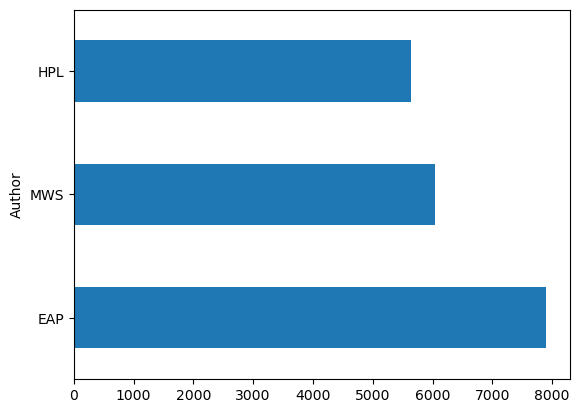

In [7]:
(horror.value_counts("Author").plot(kind="barh"))

In [20]:
Authors = ['EAP', 'HPL', 'MWS']

def supp_ponctu(phrase):
    return ''.join([char for char in phrase if char not in string.punctuation])

Values = [sum(1 for word in horror[horror['Author'] == author]['Text'] if 'fear' in supp_ponctu(word).split(' ')) for author in Authors]
fear_count = pd.DataFrame(Values, 
                          columns=['Count'],
                          index=Authors)
fear_count

,Count
EAP,24
HPL,95
MWS,110


In [15]:
[Authors, Values]

[['EAP', 'HPL', 'MWS'], [13, 73, 81]]